### Gradient Descent For Logistic Regression

Class 0 percentage: 65.36796536796537%
Class 1 percentage: 34.63203463203463%
total number of missing values: 0
initial theta values:
[0.85750359 0.72232316 0.66381671 0.76133194 0.08106416 0.59067898
 0.48954313 0.25449062 0.20792014 0.09824238 0.82946478]


<ipython-input-39-f9eb9728e317>:42: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


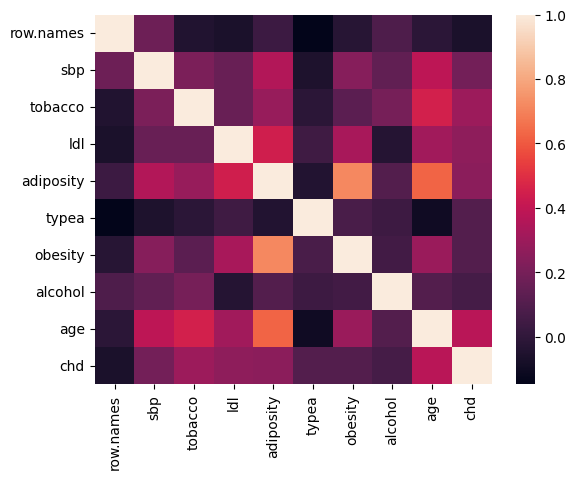

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import random

#read the csv file
df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

#manually prints the data
def print_2d_array(a):
    numrow=np.shape(a)[0]
    numcolumn= np.shape(a)[1]
    for i in range(numrow):
      for j in range(numcolumn):
        print(a[i][j], end = "   ")
        if(j+1==numcolumn):
          print("",end="\n")

#Explanatory Data Analysis
def perform_EDA(y,df):
  #Check the percentage of class 0 and 1
    class_0_count=0;
    class_1_count=0;
    for i in range(len(y)):
      if(y[i]==1):
        class_1_count+=1
      else:
        class_0_count+=1
    print("Class 0 percentage: "+str((class_0_count/len(y))*100)+"%")
    print("Class 1 percentage: "+str((class_1_count/len(y))*100)+"%")
    #check for missing values in the data frame
    #pandas define null as missing values
    #missing value denoted by NaN/None-> pandas treat these as interchangeable
    null_values = df.isnull().sum().sum()
    print("total number of missing values: "+str(null_values))
    #plot correlation matrix
    corr = df.corr()
    sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
    #How many categorical variables you have in your features?
    #categorical data contains label values rather than numeric value. The feature "family history of heart disease"
    #or 'famhist' can be either be Present or Absent
    #Therefore, we have 2 categorical variables for the feature 'famhist'

#convert categorical column
def convert_categorical_column(df):
    return  pd.get_dummies(df)

#Standardize all other features which are not categorical
def z_score_standardization(df,columns_to_standardize):
    return StandardScaler().fit_transform(df[columns_to_standardize])

#defines the function 1/(1+e^-z)
def sigmoid_function(z):
    return 1/(1+np.exp(-z))

#cost function
def logistic_cost_function(theta,x,y):
    cost=0
    for i in range(len(x)):
        z=0
        for j in range(len(x[0])):
            z+=theta[j]*x[i][j]
        cost += (-y[i])*np.log(sigmoid_function(z))-(1-y[i])*np.log(1-sigmoid_function(z))
    return cost/len(x)

#batch gradient descent algorithm
def batch_gradient_descent(theta,alpha,x,y,epochs):
    x_transpose=x.transpose()
    cost=[0]*epochs
    for i in range(epochs):
        #X(THETA)
        step_1=np.matmul(x, theta)
        sigmoid_v=np.vectorize(sigmoid_function)
        #g(X(THETA))
        step_2=sigmoid_v(step_1)
        #g(X(THETA))-y
        step_3=np.subtract(step_2,y)
        #x^T*(g(X(THETA))-y)
        step_4=np.matmul(x_transpose,step_3 )
        #(x^T*(g(X(THETA))-y))*(alpha/M)
        step_5=step_4*(alpha/len(x))
        #theta-(x^T*(g(X(THETA))-y))*(alpha/M) -> update
        theta=np.subtract(theta,step_5)
        #calculate cost
        cost[i]=logistic_cost_function(theta,x,y)
    return theta,cost


#testing gradient descent function
def test_batch_gradient_descent():
    x=np.array([[1,1,1],[1,2,0],[1,-1,0],[1,0,-1]])
    theta=np.array([[0],[0],[0]])
    a=0.1
    y=np.array([[1],[1],[0],[0]])


    R1=batch_gradient_descent(theta,a,x,y,1)[0]
    AV1=np.array([[0],[0.05],[0.025]])
    R2=batch_gradient_descent(theta,a,x,y,2)[0]
    AV2=np.array([[0.00065],[0.098],[0.0494]])
    R3,actual_cost=batch_gradient_descent(theta,a,x,y,3)
    AV3=np.array([[-0.0018],[0.144],[0.0731]])
    expected_cost=np.array([[0.6625],[0.6431],[0.607]])
    #testing
    assert np.allclose(R1, AV1, rtol=0, atol=1e-2)
    assert np.allclose(R2, AV2, rtol=0,atol=1e-2)
    assert np.allclose(R3, AV3, rtol=0,atol=1e-2)
    assert np.allclose(R1, AV1, rtol=0, atol=1e-2)

#used to randomly initialize theta between 0 and 1
def initialize_theta(x):
    theta=[0]*len(x[0])
    for i in range(len(x[0])):
      theta[i]= random.random()
    return np.array(theta)

#testing
test_batch_gradient_descent()


#mini-batch gradient descent algorithm
def mini_batch_gradient_descent(theta, alpha, x, y, epochs, batch_size):
    # m = len(y)
    total_batch = math.ceil(len(x)/batch_size)
    costs = []
    for epoch in range(epochs):
        # permutation = np.random.permutation(m)
        # shuffled_x = x[permutation]
        # shuffled_y = y[permutation]
        # for i in range(0, m, batch_size):
            # batch_x = shuffled_x[i:i+batch_size]
            # batch_y = shuffled_y[i:i+batch_size]
            # theta = batch_gradient_descent(theta, alpha, batch_x, batch_y, 1)[0]
        start=0
        end=batch_size
        for i in range(total_batch):
            x_batch = x[start:end]
            y_batch = y[start:end]
            theta = batch_gradient_descent(theta, alpha, x_batch, y_batch, 1)[0]
            start += batch_size
            end += batch_size
        cost = logistic_cost_function(theta, x, y)
        costs.append(cost)
    return theta, costs

#test mini batch gradient descent
def test_mini_batch_gradient_descent():
    x=np.array([[1,1,1],[1,2,0],[1,-1,0],[1,0,-1]])
    theta=np.array([[0],[0],[0]])
    a=0.1
    y=np.array([[1],[1],[0],[0]])


    R1=mini_batch_gradient_descent(theta,a,x,y,1,len(x))[0]
    AV1=np.array([[0],[0.05],[0.025]])
    R2=mini_batch_gradient_descent(theta,a,x,y,2,len(x))[0]
    AV2=np.array([[0.00065],[0.098],[0.0494]])
    R3,acc_cost=mini_batch_gradient_descent(theta,a,x,y,3,len(x))
    AV3=np.array([[-0.0018],[0.144],[0.0731]])
    expected_cost=np.array([[0.6625],[0.6431],[0.607]])
    #testing
    assert np.allclose(R1, AV1, rtol=0, atol=1e-2)
    assert np.allclose(R2, AV2, rtol=0,atol=1e-2)
    assert np.allclose(R3, AV3, rtol=0,atol=1e-2)
    assert np.allclose(acc_cost, expected_cost, rtol=0, atol=1e-2)

test_mini_batch_gradient_descent()

#function to plot cost vs epochs graph
def plot_cost_functions(theta,alpha,x,y,epochs,is_mini_batch,batch_size):
    for i in range(len(epochs)):
      if(is_mini_batch):
        print("Mini-batch-gradient-descent")
        theta_values,cost = mini_batch_gradient_descent(theta,alpha,x,y,epochs[i],batch_size)
      else:
        print("batch-gradient-descent")
        theta_values,cost = batch_gradient_descent(theta,alpha,x,y,epochs[i])

      print(theta_values)
      plt.plot(cost)
      plt.xlabel('Epochs')
      plt.ylabel('Cost(J(θ))')
      plt.title("Cost vs. Epoch ["+"alpha: "+str(alpha)+",epochs: "+str(epochs[i])+",batch size: "+str(len(x))+"]")
      if(is_mini_batch):
         plt.title("Cost vs. Epoch ["+"alpha: "+str(alpha)+",epochs: "+str(epochs[i])+",batch size: "+str(batch_size)+"]")
      plt.show()
      print("\n")

#implementations and calculations

#standardize the features using sklearn
columns_to_standardize=['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']
df[columns_to_standardize] = z_score_standardization(df,columns_to_standardize)
y=df['chd']
#Explanatory Data Analysis
perform_EDA(y,df)
#converting categorical columns to appropriate values
df=convert_categorical_column(df)
x = df[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age','famhist_Absent', 'famhist_Present']]

x_np = np.array(x)
#make first column of array = 1
x_np = np.concatenate(((np.array([1]*len(x_np)))[:, np.newaxis], x_np), axis=1)
y_np = np.array(y)
#initialize theta between 0 and 1 using the random function
theta_np = initialize_theta(x_np)
print("initial theta values:")
print(theta_np)
#now we have all the necessary variables to do the computation

In [ ]:
#standardized data frame
df

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
0,1,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,1,0,1
1,2,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,1,1,0
2,3,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,0,0,1
3,4,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,1,0,1
4,5,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
457,459,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488,0,1,0
458,460,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336,1,1,0
459,461,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912,0,1,0
460,462,-0.992806,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969,0,1,0


### Batch Gradient Descent


batch-gradient-descent
[0.70203607 0.69132398 0.66087068 0.7380189  0.04098061 0.57548632
 0.43124031 0.22906937 0.20172674 0.00301496 0.76922468]


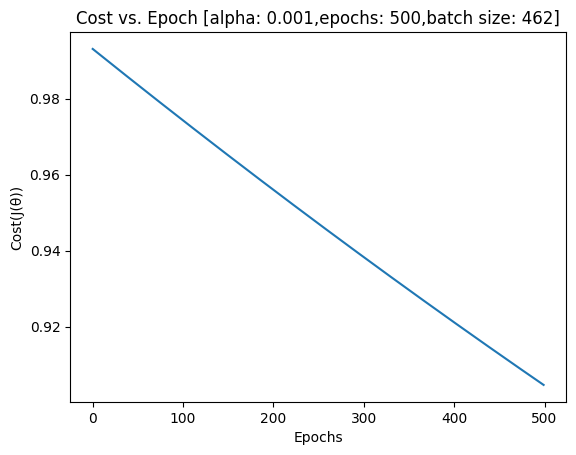



batch-gradient-descent
[ 0.56028097  0.65921437  0.65550268  0.71334341  0.00356837  0.55959985
  0.37575025  0.20420408  0.19667447 -0.08295652  0.71344106]


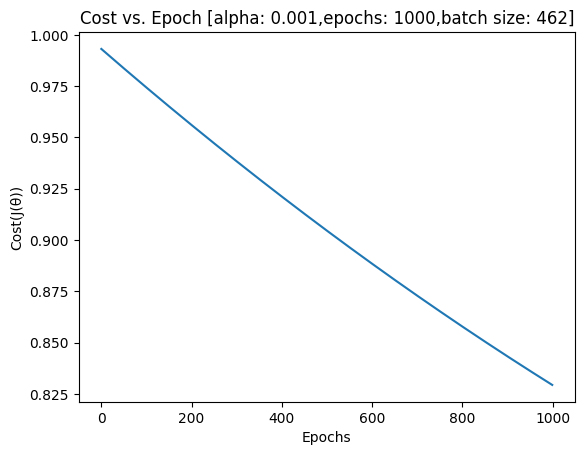



batch-gradient-descent
[-0.41793073  0.29974104  0.51565539  0.44755544 -0.11923936  0.36656601
 -0.03082433 -0.00772713  0.36632935 -0.6510665   0.30333933]


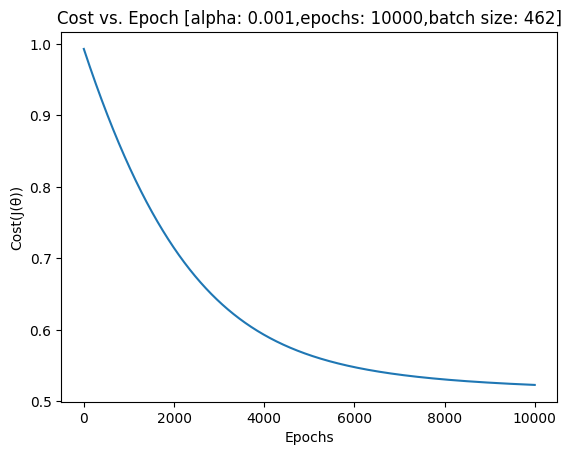

In [ ]:
#cost function vs epochs [a=0.001 batch size=462]
alpha=0.001
epochs=[500,1000,10000]
batch_size=len(x_np)
plot_cost_functions(theta_np,alpha,x_np,y_np,epochs,False,batch_size)

batch-gradient-descent
[0.84133676 0.71929625 0.66364719 0.75908556 0.07696783 0.5891992
 0.48361655 0.25193456 0.2072708  0.08829657 0.82324376]


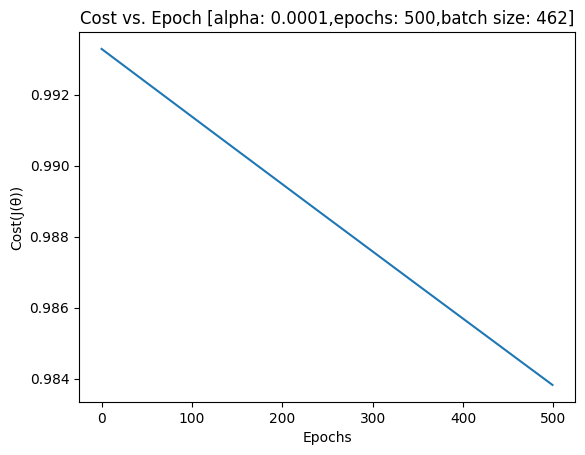



batch-gradient-descent
[0.82530822 0.71625091 0.66344829 0.75681802 0.07288778 0.58770987
 0.47770833 0.2493805  0.2066259  0.07844553 0.81706626]


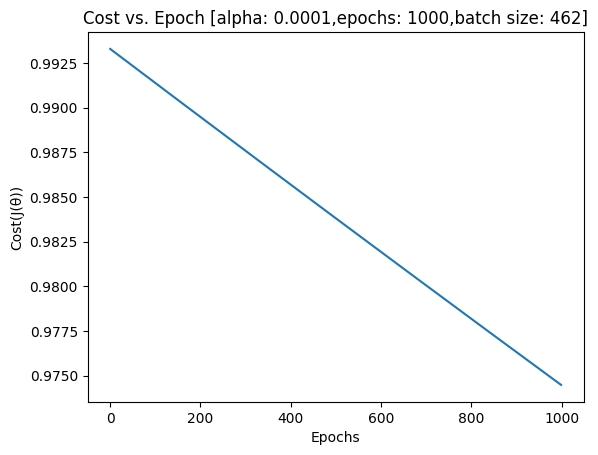



batch-gradient-descent
[ 0.56030303  0.65921291  0.65549899  0.71334154  0.0035732   0.55959878
  0.37575525  0.20420521  0.19667661 -0.08294165  0.71344825]


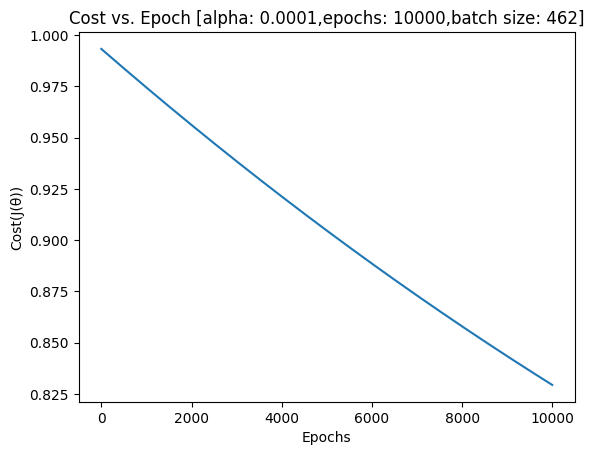

In [ ]:
#cost function vs epochs [a=0.0001 batch size=462]
alpha=0.0001
plot_cost_functions(theta_np,alpha,x_np,y_np,epochs,False,batch_size)

### Mini-batch Gradient Descent


Mini-batch-gradient-descent
[-0.12968176  0.35828539  0.58005496  0.50154356 -0.12311307  0.35757427
  0.06320159  0.07105215  0.20417401 -0.48660233  0.42712414]


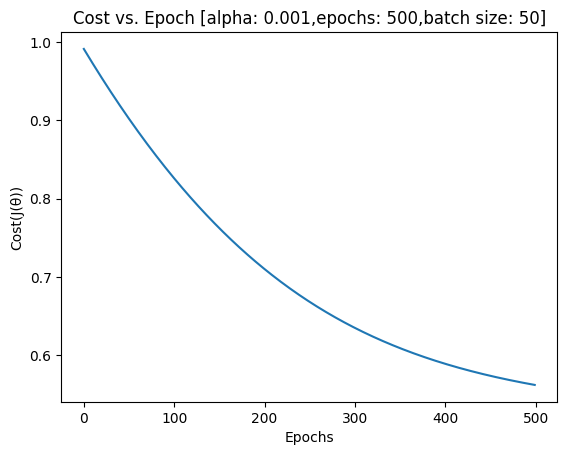



Mini-batch-gradient-descent
[-0.38788048  0.22055855  0.49716567  0.39621894 -0.04769898  0.26066336
 -0.06233762  0.00517411  0.32014999 -0.62828559  0.31060868]


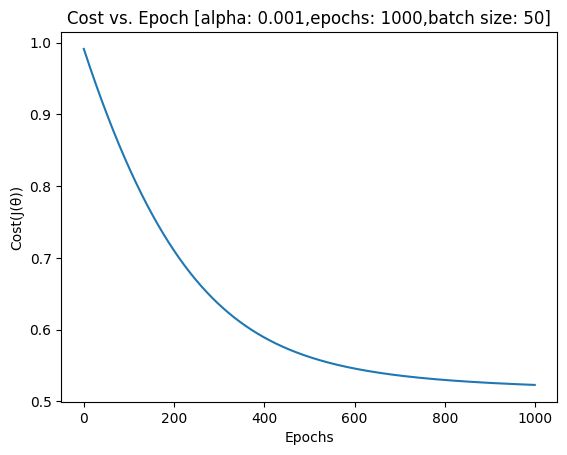



Mini-batch-gradient-descent
[-0.51577427  0.07864546  0.34294037  0.28884008  0.35247721  0.27398373
 -0.36991653  0.0126602   0.50885334 -0.64492885  0.19935814]


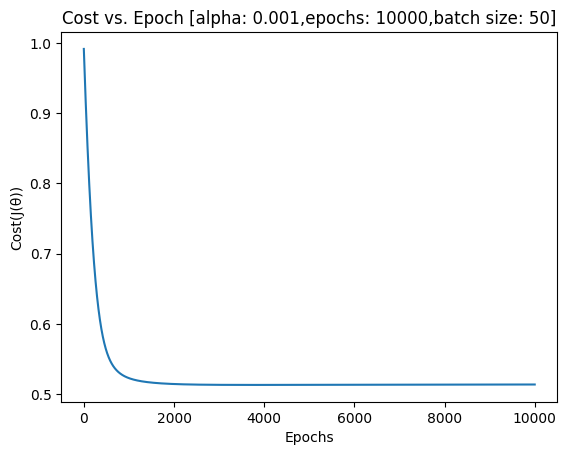

In [ ]:
#mini batch gradient descent a=0.001 and batch size=50
alpha=0.001
batch_size=50
plot_cost_functions(theta_np,alpha,x_np,y_np,epochs,True,batch_size)

Mini-batch-gradient-descent
[0.70445894 0.67836837 0.66161696 0.73170102 0.039754   0.56418424
 0.42684004 0.23205895 0.19795032 0.00477452 0.76988798]


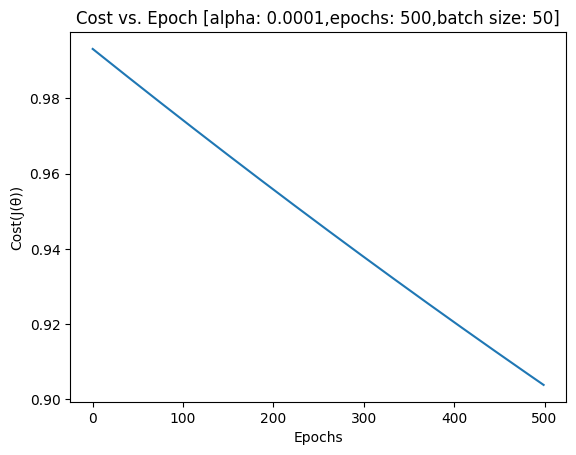



Mini-batch-gradient-descent
[ 0.56442523  0.63427537  0.65692291  0.70135336  0.00205221  0.53758256
  0.36742413  0.20993682  0.1894083  -0.07996354  0.71459234]


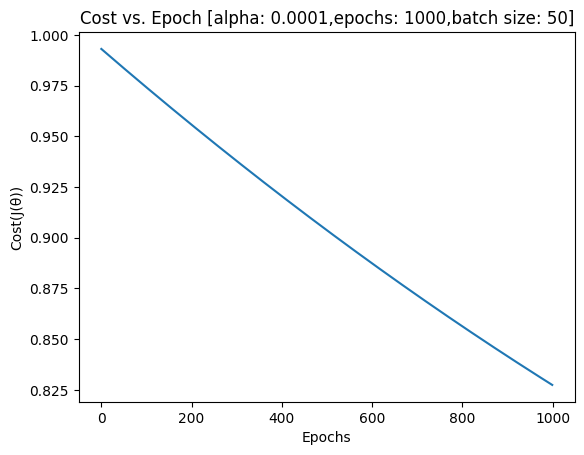



Mini-batch-gradient-descent
[-0.38782855  0.2205369   0.4972037   0.39623304 -0.04772208  0.26076316
 -0.06228168  0.0052177   0.32017881 -0.62824029  0.31061531]


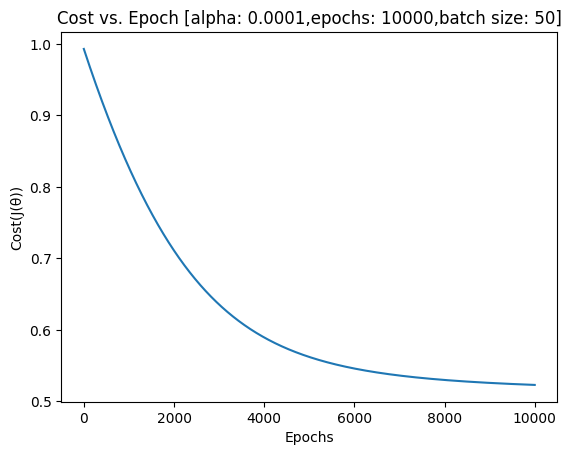

In [ ]:
#mini batch gradient descent a=0.0001 and batch size=50
alpha=0.0001
plot_cost_functions(theta_np,alpha,x_np,y_np,epochs,True,batch_size)

### Stochastic Gradient Descent

In [ ]:
#Stochastic Gradient Descent a=0.001 and batch size=1
# alpha=0.001
# batch_size=1
# plot_cost_functions(theta_np,alpha,x_np,y_np,epochs,True,batch_size)

In [ ]:
#Stochastic Gradient Descent a=0.0001 and batch size=1
# alpha=0.0001
# plot_cost_functions(theta_np,alpha,x_np,y_np,epochs,True,batch_size)

### sklearn Logistic Regression


In [ ]:
#sklearn implementation of logistic regression

model = LogisticRegression()
model.fit(x_np, y_np)
print("Theta values:")
print(model.coef_)

Theta values:
[[-3.37872612e-05  1.32929046e-01  3.61422003e-01  3.55261205e-01
   1.42660626e-01  3.79398039e-01 -2.55735991e-01  3.66488919e-03
   6.47590450e-01 -4.51432596e-01  4.51398809e-01]]
